### Preprocessing Age Feature 

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

train =pd.read_csv('C:/Users/JH/Desktop/adjtrain.csv')
test = pd.read_csv('C:/Users/JH/Desktop/adjtest.csv')

train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  Title        891 non-null    object 
 13  Family       891 non-null    int64  
 14  First Name   891 non-null    object 
 15  Cabin_Grade  891 non-null    object 
 16  Cabin_Score  891 non-null    int64  
dtypes: float64(2), int64(7), object(8)
memory usage: 118.5+ KB


In [9]:
train_test_data = [train, test]

In [10]:
print("-----train Check Null------")
train.isnull().sum()

-----train Check Null------


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Title            0
Family           0
First Name       0
Cabin_Grade      0
Cabin_Score      0
dtype: int64

In [11]:
print("-----test Check Null------")
test.isnull().sum()

-----test Check Null------


PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Title            0
Family           0
Cabin_Grade      0
Cabin_Score      0
dtype: int64

### Age Feature 의 경우 test, train set 모두 결측지가 존재합니다. 

In [ ]:
print("-----train Check Zero------")
train.isin([0]).sum()

-----train Check Zero------


PassengerId      0
Survived       549
Pclass           0
Name             0
Sex              0
Age              0
SibSp          608
Parch          678
Ticket           0
Fare            15
Cabin            0
Embarked         0
dtype: int64

### Age 의 Null 값을 어떻게 해결할 것인가?
### SIMPLE SOLUTION : Age 의 평균
### MY OPINION : 특정 Feature 을 이용하면 나이를 유추할 수 있지 않을까?
### Sol 1) Name 의 Title 을 이용하자 ex) Mrs, Miss, Mr
### Sol 2) SibSp, Parch 를 이용하면 이사람이 부모인지, 자식인지 유추가 가능하지 않을까?
### My Choice = Sol 1) 이유 : Title 이 없는 사람은 없을 것이다. (데이터 상 실제 체크 필요) , 2번 안의 경우 동승자가 없을 경우 유추할 수가 없다. 

In [2]:
# 필요한 데이터 Name, Age https://regexr.com/  < 킹갓제네럴사이트 정규표현식을 시각화해서 보여준다.

train['Title'] = train.Name.str.extract(' ([A-Za-z]+)\.')
train.head()

NameError: name 'train' is not defined

In [3]:
test['Title'] = test.Name.str.extract(' ([A-Za-z]+)\.')
test.head(50)

NameError: name 'test' is not defined

In [4]:
pd.crosstab(train['Title'],train['Sex'])

NameError: name 'train' is not defined

In [9]:
for dataset in train_test_data:
    dataset['Title'] = dataset['Title'].replace(['Countess','Lady','Mlle','Mme','Capt', 'Col','Dona','Don','Dr','Major','Dr','Jonkheer','Major','Rev','Sir'], 'Others')
    dataset['Title'] = dataset['Title'].replace('Ms','Miss')

train[['Title','Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.699454
2,Mr,0.156673
3,Mrs,0.792000
4,Others,0.423077


In [12]:
pd.crosstab(test['Title'],test['Sex'])

Sex,female,male
Title,,
Master,0,21
Miss,79,0
Mr,0,240
Mrs,72,0
Others,1,5


In [13]:
pd.crosstab(train['Title'],train['Survived'])

Survived,0,1
Title,,
Master,17,23
Miss,55,128
Mr,436,81
Mrs,26,99
Others,15,11


In [12]:
train[['Title','Age']].groupby(['Title']).mean()

,Age
Title,
Master,4.574167
Miss,21.816327
Mr,32.368090
Mrs,35.898148
Others,42.960000


In [13]:
for dataset in train_test_data:
    dataset['Age'] = dataset['Age'].fillna('FuckingNan')

In [14]:
""" for dataset in train_test_data:
    dataset.loc[(train['Title'] == 'Master') & (dataset['Age'] == 'FuckingNan'), 'Age'] = 4.57
    dataset.loc[(train['Title'] == 'Miss') & (dataset['Age'] == 'FuckingNan'), 'Age'] = 21.81
    dataset.loc[(train['Title'] == 'Mr') & (dataset['Age'] == 'FuckingNan'), 'Age'] = 32.36
    dataset.loc[(train['Title'] == 'Mrs') & (dataset['Age'] == 'FuckingNan'), 'Age'] = 35.89
    dataset.loc[(train['Title'] == 'Others') & (dataset['Age'] == 'FuckingNan'), 'Age'] = 42.96 """

" for dataset in train_test_data:\n    dataset.loc[(train['Title'] == 'Master') & (dataset['Age'] == 'FuckingNan'), 'Age'] = 4.57\n    dataset.loc[(train['Title'] == 'Miss') & (dataset['Age'] == 'FuckingNan'), 'Age'] = 21.81\n    dataset.loc[(train['Title'] == 'Mr') & (dataset['Age'] == 'FuckingNan'), 'Age'] = 32.36\n    dataset.loc[(train['Title'] == 'Mrs') & (dataset['Age'] == 'FuckingNan'), 'Age'] = 35.89\n    dataset.loc[(train['Title'] == 'Others') & (dataset['Age'] == 'FuckingNan'), 'Age'] = 42.96 "

In [15]:
title_list = ['Master', 'Miss', 'Mr', 'Mrs', 'Others']
Age = [4.57, 21.81, 32.36, 35.89, 42.96]
for dataset in train_test_data:
    for i,j in zip(title_list, Age):
        dataset.loc[(train['Title'] == i) & (dataset['Age'] == 'FuckingNan'), 'Age'] = j

In [16]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Mrs
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Mr
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Mr
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Mrs


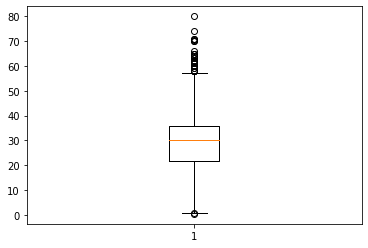

In [17]:
import numpy as np

plt.boxplot(train['Age'])
plt.show()

In [19]:
Q3 = train['Age'].quantile(.75)
Q1 = train['Age'].quantile(.25)

print('Q3 :', Q3, 'Q1 :', Q1)


Q3 : 35.89 Q1 : 21.81


In [33]:
IQR = 1.5*(Q3-Q1)
IQR

21.120000000000005

In [38]:
def get_category(age):
    age_band = ''
    if age < Q1 : age_band = 'Y'
    elif age < Q3 : age_band = 'A'
    elif age < Q3 + IQR : age_band = 'O'
    else : age_band ='VO'
    
    return age_band

for dataset in train_test_data:
    dataset['Age_Band'] = dataset['Age'].apply(lambda x : get_category(x))


In [39]:
train['Age_Band'].value_counts()

A     448
Y     208
O     202
VO     33
Name: Age_Band, dtype: int64

In [40]:
pd.crosstab(train['Age_Band'],train['Survived'])

Survived,0,1
Age_Band,,
A,292,156
O,115,87
VO,23,10
Y,119,89


In [42]:
adjtrain = train.to_csv('C:/Users/JH/Desktop/adjtrain.csv',index = False)
adjtest = test.to_csv('C:/Users/JH/Desktop/adjtest.csv',index = False)

In [41]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Family,Cabin_Grade,Cabin_Score,Age_Band
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Mr,0,S,0,A
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Mrs,1,S,0,O
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Mr,0,S,0,VO
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Mr,0,S,0,A
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Mrs,2,S,0,A
